In [331]:
# 드라이브 마운트
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 머신러닝 개요

## 도미 데이터

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
                30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 
                36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]

## 빙어 데이터

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 
                12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 
                13.4, 12.2, 19.7, 19.9]

## 데이터 비교


Text(0, 0.5, 'bream weight')

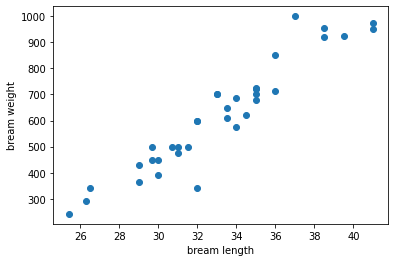

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('bream length')
plt.ylabel('bream weight')

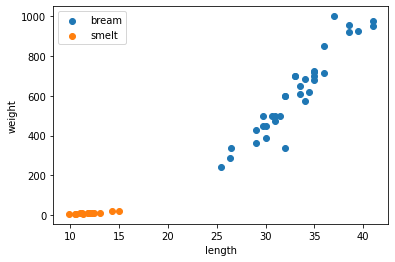

In [ ]:
plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## 2차원 리스트로 데이터 변형

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


## 정답 데이터 준비

In [ ]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## k-최근접 알고리즘 개요

In [ ]:
# kNN 모델 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
# 모델 훈련
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [ ]:
# 모델 평가
kn.score(fish_data, fish_target)

1.0

In [ ]:
# 새로운 데이터를 활용한 결과 예측
kn.predict([[30, 600]])

array([1])

score:  1.0
predict:  [1]


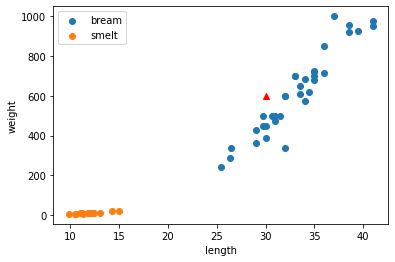

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import platform

kn = KNeighborsClassifier()
# 모델 생성
kn.fit(fish_data, fish_target) # 모델 훈련
print("score: ", kn.score(fish_data, fish_target)) # 모델 평가
print("predict: ", kn.predict([[30, 600]])) # 정답 예측, 리턴값: class label(분류값: 0, 1)


plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.scatter(30, 600, marker='^', color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## k-최근접 알고리즘 속성

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143


# 데이터 다루기

## 훈련 세트와 테스트 세트 만들기

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
              30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
              33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0,
              36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
              10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 
              12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
               925.0, 975.0, 950.0, 6.7,  7.5, 7.0, 9.7, 9.8, 8.7, 
               10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

## train데이터와 test데이터로 분리

In [ ]:
# 올바른 분류 방법이 아님
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# 도미 데이터로 훈련
kn = kn.fit(train_input, train_target)
            
# 빙어 데이터로 평가
kn.score(test_input, test_target)

0.0

## 넘파이

In [ ]:
import numpy as np

# 데이터 array로 변경
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
# 인덱스 넘파이 array 생성
np.random.seed(42)
index_list = np.arange(49)
print(index_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [ ]:
# 인덱스 리스트 랜덤으로 섞음
np.random.shuffle(index_list)
print(index_list)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
# 훈련 세트 생성
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]

# 테스트 세트 생성
test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]

## 무작위로 섞인 데이터 확인하기

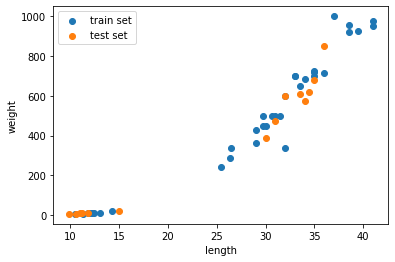

In [ ]:
plt.scatter(train_input[: ,0], train_input[: ,1], label="train set")
plt.scatter(test_input[: ,0], test_input[: ,1], label = "test set")

plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

## 두 번째 머신러닝 프로그램

In [ ]:
kn = kn.fit(train_input, train_target)
print(f"score: {kn.score(test_input, test_target)}")
print(f"predict: {kn.predict(test_input)}")
print(f"test_target: {test_target}")

score: 1.0
predict: [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
test_target: [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# 가장 가까운 이웃 찾기

## Numpy를 활용한 데이터 전처리

In [ ]:
# column_stack
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.column_stack((a, b))

d = np.vstack((a, b))
e = np.hstack((a, b))

print(c, d, e, sep="\n")

[[1 4]
 [2 5]
 [3 6]]
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [ ]:
# concatenate
arr1 = np.array([[1, 2, 3], 
                [4, 5, 6]])

arr2 = np.array([[7, 8, 9],
                [10, 11, 12]])

arr3 = np.concatenate((arr1, arr2))
print(arr3)

arr4 = np.concatenate((arr1, arr2), axis = 1)
print(arr4)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


## 사이킷런으로 훈련 테스트 세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42
)

train_input = np.array(train_input)
test_input = np.array(test_input)

train_target = np.array(train_target)
test_target = np.array(test_target)

print(f'train_input: {train_input.shape}',
      f'test_input: {test_input.shape}', sep = "\n")

print(f'train_target: {train_target}',
      f'test_target: {test_target}', sep = "\n")

train_input: (36, 2)
test_input: (13, 2)
train_target: [1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1]
test_target: [0 0 1 0 1 0 1 1 1 1 1 1 1]


## 모델 생성 및 테스트

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print(f"score: {kn.score(test_input, test_target)}")

score: 1.0


In [ ]:
# 25, 150 예측하기 -> 이상한 결과 발생
print(kn.predict([[25, 150]]))

[0]


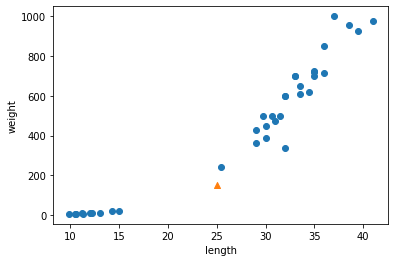

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 가장 가까운 이웃과의 거리 계산


In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])

print(distances, indexes, sep = "\n")

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


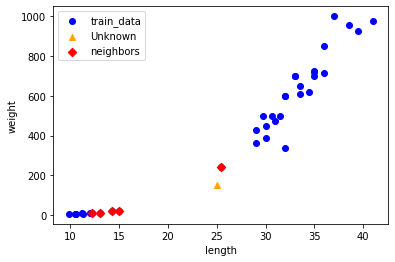

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1], label='train_data', color='b')
plt.scatter(25, 150, marker='^', color='orange', label='Unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],
marker='D', label='neighbors', color='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [ ]:
print("neighbors: ", train_input[indexes])
print("target: ", train_target[indexes])

neighbors:  [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
target:  [[1 0 0 0 0]]


## 기준을 맞춰서 확인해보기

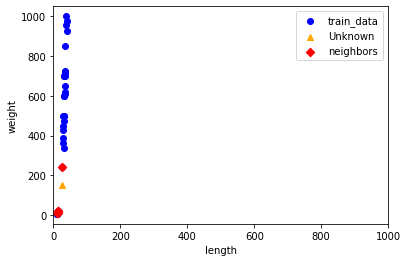

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1],
label='train_data', color='b')
plt.scatter(25, 150, marker='^', color='orange', label='Unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],
marker='D', label='neighbors', color='r')
plt.xlim((0, 1000)) # x축의 눈금 간격을 y축과 동일하게 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## 넘파이를 이용한 스케일링

In [ ]:
mean = np.mean(train_input, axis=0) # axes=0: 각 컬럼의 평균 계산
std = np.std(train_input, axis=0)
print(mean, std)

train_scaled = (train_input - mean) / std

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


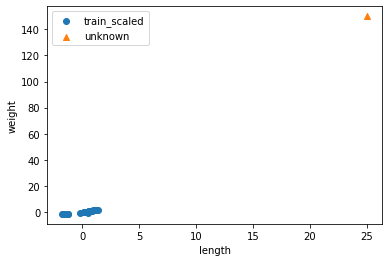

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(25, 150, marker='^', label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

표준 점수 sample [-0.23012627 -0.94060693]


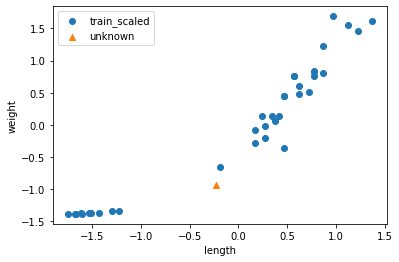

In [ ]:
# 샘플 데이터를 표준 점수로 변환
new = ([25, 150] - mean) / std
print("표준 점수 sample", new)
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(new[0], new[1], marker='^', label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## 새로운 데이터로 예측

In [327]:
# 표준점수로 변환한 훈련 데이터로 k-NN 훈련
kn.fit(train_scaled, train_target)
# 테스트 세트를 표준 점수로 변환
test_scaled = (test_input - mean) / std
print(kn.score(test_scaled, test_target))
# 표준 점수로 변환된 샘플 데이터를 가지고 예측
print(kn.predict([new]))

1.0
[1]


[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]


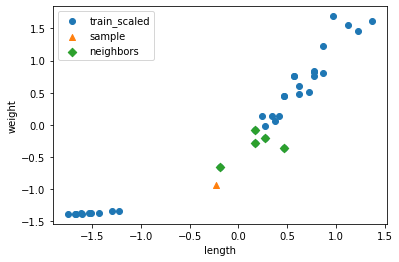

In [329]:
# 표준 점수로 변경된 샘플 데이터의 이웃 찾기 및 산점도
distances, indexes = kn.kneighbors([new])
print(distances)
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(new[0], new[1], marker='^', label='sample')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1],
marker='D', label='neighbors')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()